In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import ast
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, mean_squared_error
from sklearn import metrics
from scipy.stats import boxcox
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/6414 Project")

In [3]:
df = pd.read_csv("train.csv")

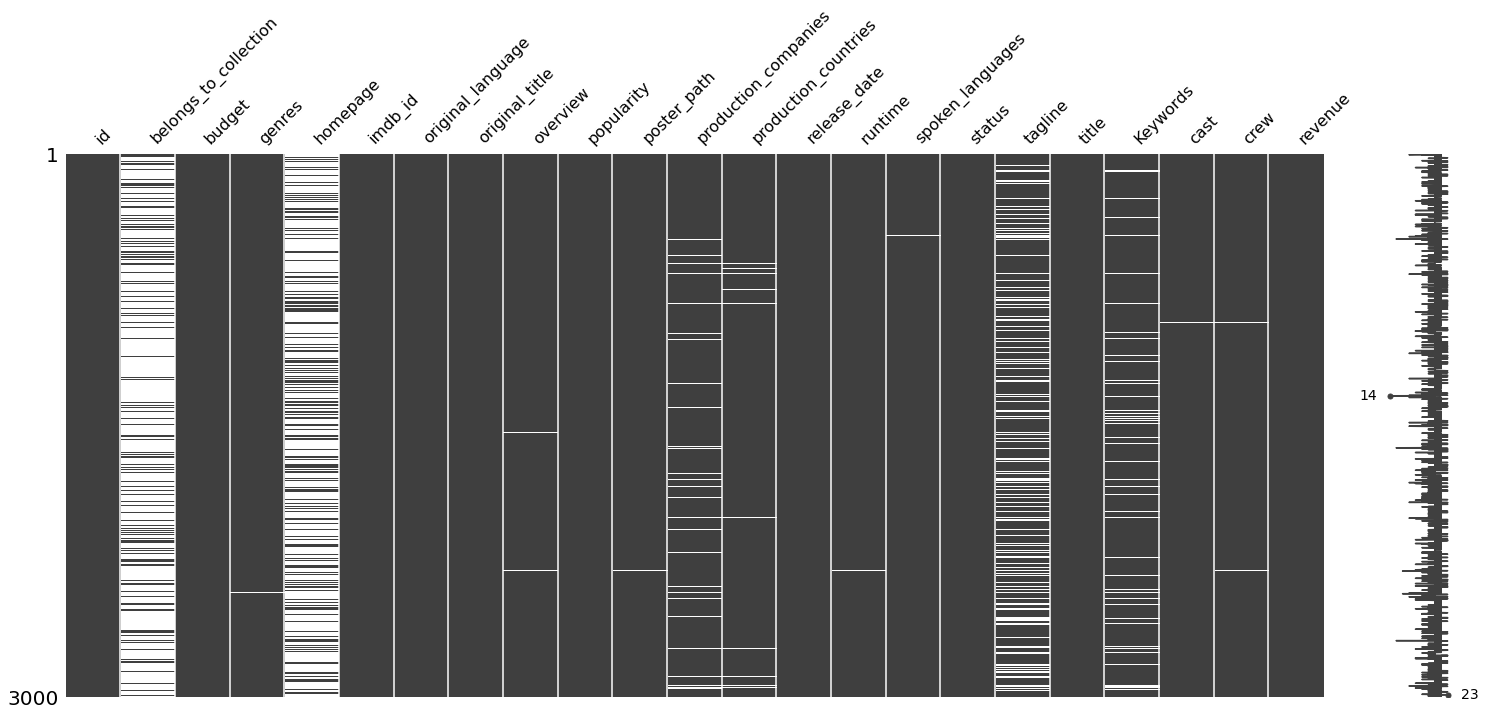

In [4]:
import missingno as msno
msno.matrix(df)

In [ ]:
df = df.drop(columns = ["homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "Keywords"]) 
df["collectionYN"] = df["belongs_to_collection"].notnull()*1
df = df.drop(columns = ["belongs_to_collection", "genres"]) 
df["EnYN"] = (df['original_language'] == "en")*1
df = df[df["status"] == "Released"]
df = df.drop(columns = ["status", "original_language"])
df = df[df["revenue"]>=10000]
df= df[df["spoken_languages"].notnull()]
df["spoken_languages"] = df["spoken_languages"].apply(lambda x: ast.literal_eval(x))
df["spoken_languages"] = df["spoken_languages"].apply(len)
df= df[df["cast"].notnull()]
df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x))
df= df[df["crew"].notnull()]
df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x))

In [ ]:
res = []
for i in df["crew"]:
  comb = []
  for j in i:
    if j["job"] == 'Director':
      comb.append(j["name"])
  res.append(comb)
res = np.array(res)
df["Director"] = res
df = df.drop(columns = ["crew"]) 
df["production_companies"] = df["production_companies"].apply(lambda x: ast.literal_eval(x) if type(x)==str else x)
df = df.drop(columns = ["production_countries"]) 
df["Director"] = df["Director"].apply(lambda x: x[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


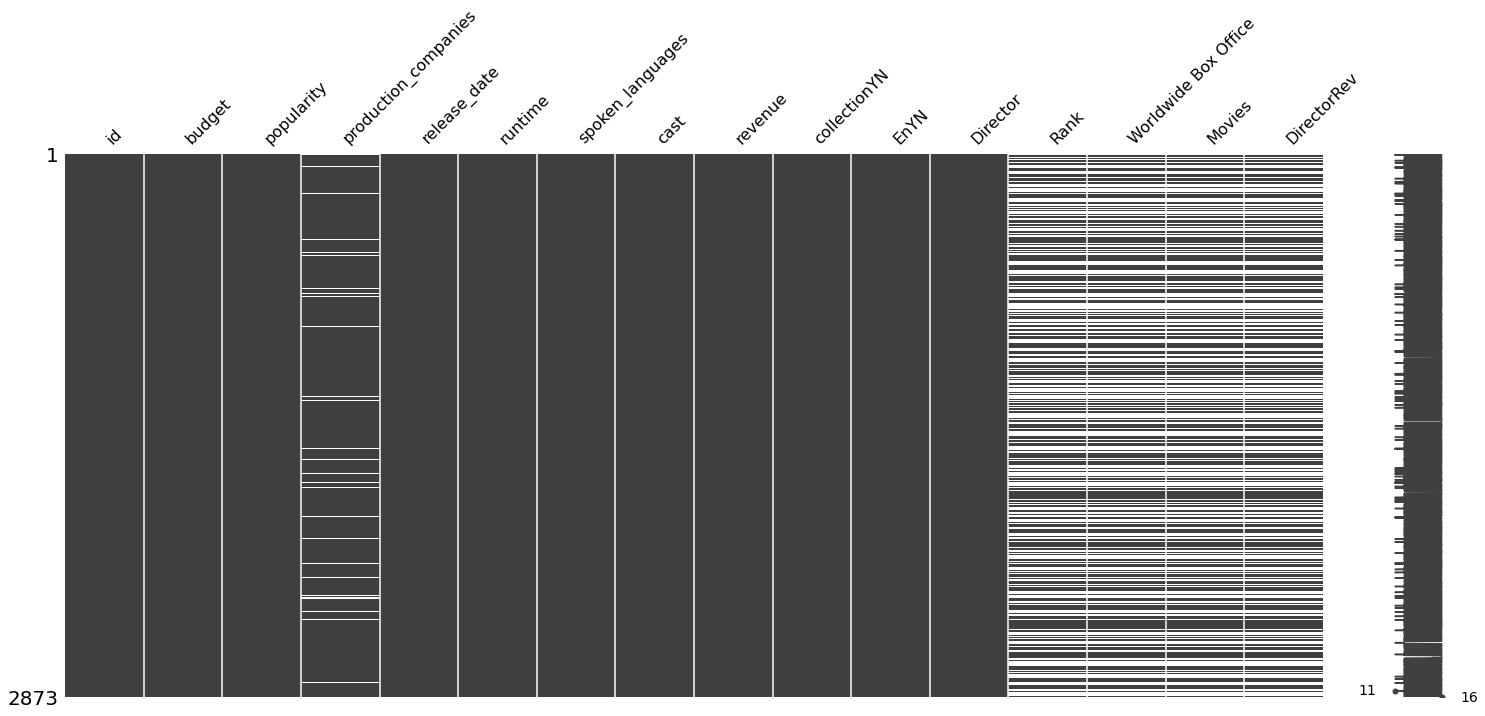

In [ ]:
dir_df = pd.read_csv('directors.txt')
dir_df = dir_df.rename(columns={"Name": "Director"})
res = pd.merge(df,dir_df,on='Director', how= "left")
res = res.rename(columns = {"Average": "DirectorRev"})
import missingno as msno
msno.matrix(res)

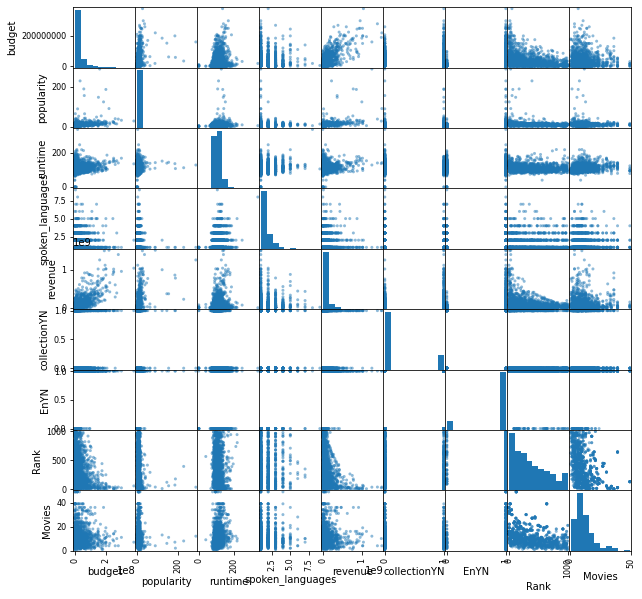

In [ ]:
scatter_matrix(res.drop("id", axis = 1), figsize=(10, 10))
plt.show()

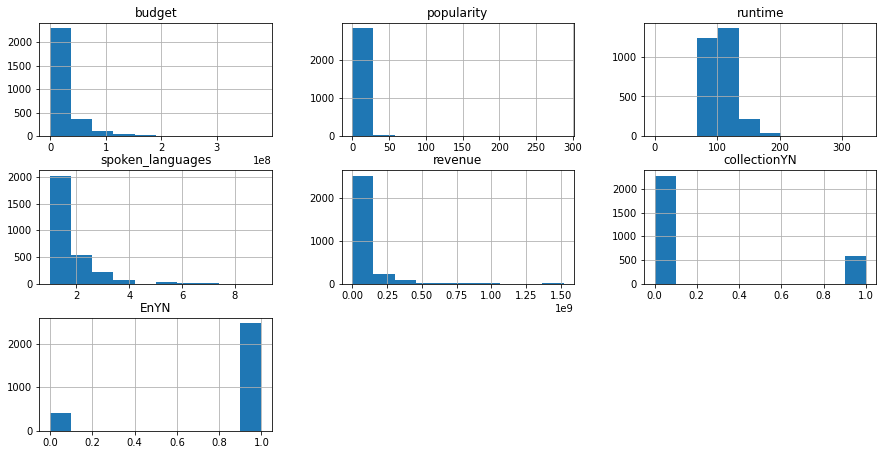

In [ ]:
df.drop("id", axis = 1).hist(figsize=(15,7.5))
plt.show()

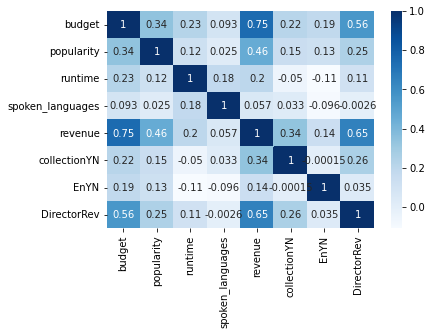

In [ ]:
res = res.drop(columns = ["id","cast","Movies", "production_companies", "release_date", "Director", "Rank", "Worldwide Box Office"])
res = res.fillna(0)
res["DirectorRev"] = res["DirectorRev"].str.replace(".", "")
res["DirectorRev"] = res["DirectorRev"].str.replace("$", "")
res["DirectorRev"] = res["DirectorRev"].apply(float)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(res.corr(), cmap='Blues', annot=True)

In [ ]:
res = res.fillna(0)
res

,budget,popularity,runtime,spoken_languages,revenue,collectionYN,EnYN,DirectorRev
0,14000000,6.575393,93.0,1,12314651,1,1,27925843.0
1,40000000,8.248895,113.0,1,95149435,1,1,97371973.0
2,3300000,64.299990,105.0,1,13092000,0,1,118093801.0
3,1200000,3.174936,122.0,2,16000000,0,0,0.0
4,0,1.148070,118.0,1,3923970,0,0,0.0
...,...,...,...,...,...,...,...,...
2868,0,9.853270,102.0,1,1596687,0,1,0.0
2869,0,3.727996,102.0,1,180590,0,0,0.0
2870,65000000,14.482345,120.0,1,89456761,0,1,52347239.0
2871,42000000,15.725542,90.0,1,171963386,0,1,76558656.0


In [ ]:
res.to_csv('exported.csv')

In [ ]:
X = res[['budget',"popularity",	"runtime",	"spoken_languages",	"collectionYN",	"EnYN",	"DirectorRev"]]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy =True, with_mean = True, with_std = True)
X = scaler.transform(X)
y = res['revenue']#.apply(lambda x: math.log(x))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
model = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
y_true = y_test

In [ ]:
    import sklearn.metrics as metrics

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.6466
r2:  0.6462
MAE:  42999738.1674
MSE:  5074247504802875.0
RMSE:  71233752.5672


In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

42999738.16743894

In [ ]:
y_pred

In [ ]:
residuals = predictions - y_test
plt.scatter(predictions, residuals)

NameError: ignored

In [ ]:
model.score(x_test, y_test)

In [ ]:
alphas = [0.000001, 0.1, 1, 10, 100, 1000]
for alpha in alphas:
  model2 = Lasso(alpha=alpha).fit(x_train, y_train)
  print(f'alpha = {alpha}:', model2.score(x_test, y_test))

In [ ]:
df['revenue_star'] = np.log(df['revenue'])
plt.hist(df['revenue_star'])

In [ ]:
res['revenue_star'] = boxcox(res['revenue'])[0]
plt.hist(res['revenue_star'])

In [ ]:
y_star = res['revenue_star']#.apply(lambda x: math.log(x))
x_train, x_test, y_train, y_test = train_test_split(X, y_star, test_size=0.2, random_state=101)
model3 = LinearRegression().fit(x_train, y_train)

In [ ]:
model3.score(x_test, y_test)

In [ ]:
predictions = model3.predict(x_train)
residuals = predictions - y_train
plt.scatter(predictions, residuals)

y_true = model3.predict(x_test)
y_pred = y_test

explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
print('explained_variance: ', round(explained_variance,4)) 
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
weight = 1
for i in range(10):
  WLS = LinearRegression().fit(x_train, y_train, sample_weight = weight)
  residual = WLS.predict(x_train) - y_train
  Res_WLS = LinearRegression().fit(x_train, abs(residual))
  s = Res_WLS.predict(x_train)
  weight = 1 / s ** 2
  # WLS = LinearRegression().fit(x_train, y_train, sample_weight=weight)
  print(WLS.score(x_test, y_test))
# WLS.score(x_test, y_test)

In [ ]:
predictions = WLS.predict(x_train)
residuals = predictions - y_train
plt.scatter(predictions, residuals / weight)

In [ ]:
residuals / weight

In [ ]:
df = res
df_rev = df[df["DirectorRev"] != 0]
# df_no_rev = df[!df["revenue_yn"]]

X_rev = df_rev[['budget',"popularity", 'collectionYN',	'DirectorRev']]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy =True, with_mean = True, with_std = True)
y_rev = df_rev['revenue']
x_train_rev, x_test_rev, y_train_rev, y_test_rev = train_test_split(X_rev, y_rev, test_size=0.2, random_state=101)
# df_standardized = pd.DataFrame(temp, columns = ['budget', 'popularity', 'runtime'])
model_rev = LinearRegression().fit(x_train_rev, y_train_rev)
predictions_rev = model_rev.predict(x_train_rev)
model_rev.score(x_test_rev, y_test_rev)

In [ ]:
boxcox(res['revenue'])

In [ ]:
res

In [ ]:
-4.177*10**7+1.6536*250000000+2.226*10**6*6+2.51456*10**5*163-2.389625*10**6*1+4.7235688*10**7*1

470819391.0

In [ ]:
470819391.0-(5.76664*10**6*1)+(4.716979*10**(-1)*561088822)

729717170.0508739

In [ ]:
5.76664*10**6*1

5766640.0

In [ ]:
4.716979*10**(-1)*561088822

264664419.05087385